<a href="https://colab.research.google.com/github/orbenishay/Regression-Project/blob/Hagai/Amsterdam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amsterdam Airbnb** 
https://www.kaggle.com/adityadeshpande23/amsterdam-airbnb

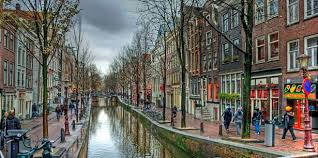


**Introduce noise to the dataset**:
*   Outliers (per subset)
*   Bivariate outlier
*   Zeros
*   Nulls

**Pipeline**:
*   Feature selection
*   Relevance
*   Drop columns with high correlation
*   Scaling
*   Order categorical data
*   Target transformation (log?)
*   Split train/test
*   List item
*   List item


*   List item







EDA:

Data Cleansing:

Models:






In [2]:

import pandas as pd # General tools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
from datetime import datetime # Pandas
from datetime import timedelta
from scipy.optimize import curve_fit# For curve fitting
from sklearn.base import TransformerMixin # For transformations and predictions
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator # For predictions
from sklearn.metrics import mean_squared_log_error as msle # For scoring
from sklearn.metrics import mean_squared_error as mse # For scoring
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
import pydot as pyd # For the tree visualization
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.model_selection import train_test_split # For validation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
!pip install pydot;


In [3]:
import sys

if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()

Saving Amsterdam1.csv to Amsterdam1.csv


In [27]:
bnb = pd.read_csv('Amsterdam1.csv', index_col='#')

bnb['ring']=pd.cut(x=bnb['d_centre'], bins=4, right=True, labels=['Center','Off Center','periphery','Suburbs'],\
retbins=False, precision=3, include_lowest=False, duplicates='raise') # bin distance  

bnb.head()

,latitude,longitude,d_centre,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,minimum_nights,number_of_reviews,instant_bookable,room_type,price,ring
#,,,,,,,,,,,,,,,
568,52.365960,4.896755,1.481250,4,1.0,2,91,1,103,2,0,Possible,Entire home/apt,200,Center
608,52.401825,4.910823,2.631413,4,1.0,2,91,1,103,2,3,Possible,Entire home/apt,175,Center
805,52.370783,4.884055,1.400220,4,1.0,2,91,1,103,2,0,Possible,Entire home/apt,350,Center
1022,52.356504,4.887436,2.648968,3,1.5,1,91,1,103,2,1,Possible,Entire home/apt,400,Center
1040,52.372724,4.896202,0.751078,4,1.0,2,91,1,103,2,0,Possible,Entire home/apt,400,Center


## **Data Cleansing**

In [0]:
# DataFrame actions:
bnb = bnb[bnb.isnull().sum(axis=1)<3] # Remove rows with more than 3 `NaN`'s.
bnb = bnb.loc[:, ~bnb.columns.str.contains(r'facebook|num', case=False)] # remove specific columns
bnb.drop_duplicates(inplace=True) # Remove duplicates
bnb.drop_duplicates(subset=['director_name', 'title_year'], inplace=True) # Remove duplicates with subsets: Only consider certain columns for identifying duplicates, by default use all of the columns
bnb.index.value_counts().head() # look for duplications
bnb.loc['Ben-Hur'] # show all columns values for a specific row
bnb.loc[:,['imdb_score','budget']] # slice dataframe (show specific columns)
bnb[bnb.director_name.isin(good_directors)] # filter on column values
bnb.director_name.loc[:,].count() # count of entries in a column of a df
bnb.director_name.shape # dimention of df
bnb[['city','dock_count']].groupby('city').describe() # describe with subset

## **EDA**

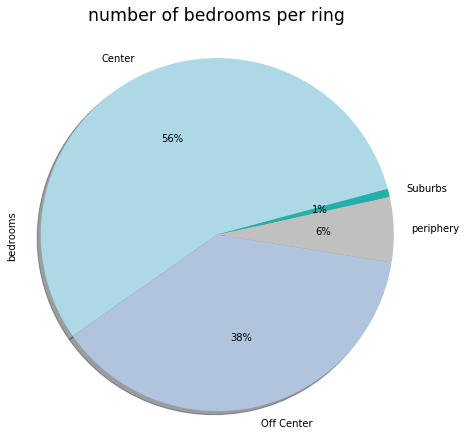

In [28]:
my_colors = ['lightblue','lightsteelblue','silver','lightseagreen','khaki','peachpuff']
Pie = bnb.groupby('ring')['bedrooms'].sum().plot.pie(autopct='%1.f%%', startangle=15,colors=my_colors,shadow = True,figsize=(7, 7))
plt.title('number of bedrooms per ring', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.axis('equal')
plt.show()

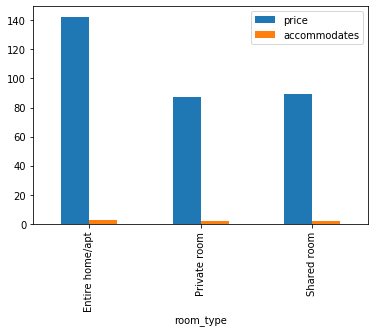

In [5]:
bnb.groupby('room_type').agg({'price': 'mean', 'accommodates': 'median'}).plot(kind='bar');


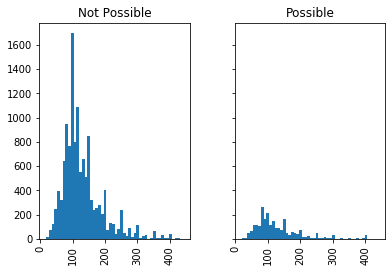

In [6]:
bnb.hist(column='price', by='instant_bookable', bins=50, sharex=True, sharey=True);

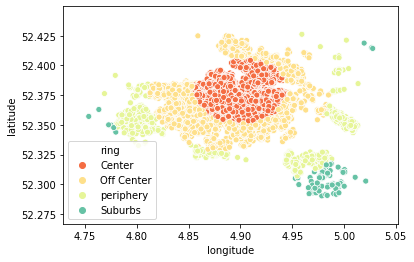

In [26]:
# ax = bnb.plot(kind = 'scatter',x='longitude',y='latitude', c='d_centre',colormap='viridis', figsize = (15, 10))
sns.scatterplot(x='longitude', y='latitude', hue='ring', data=bnb, palette="Spectral")

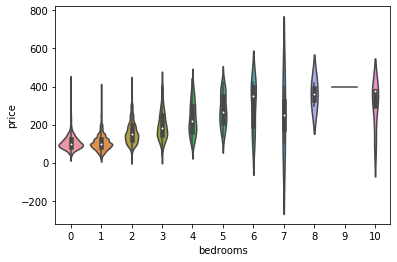

In [8]:
sns.violinplot(x='bedrooms', y='price', data=bnb) #order=cut_order

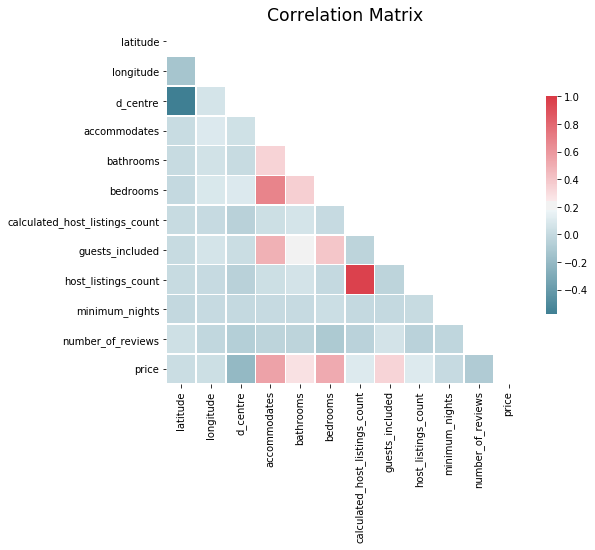

In [9]:
# Correlation matrix:
corr = bnb.corr()
mask = np.zeros_like(corr, dtype=np.bool) #Generating a mask for the upper triangle
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8,8)) #Setting up the matplotlib figure
cmap = sns.diverging_palette(220,10, as_cmap=True) #Generating a custom diverging colormap
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax) #Drawing the heatmap with the mask
plt.title("Correlation Matrix", fontsize='xx-large')
plt.show()

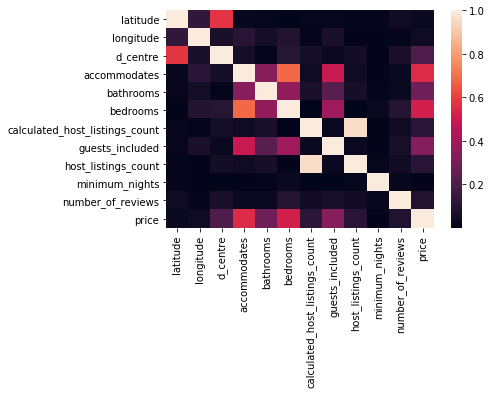

In [14]:
sns.heatmap(bnb.corr().abs())

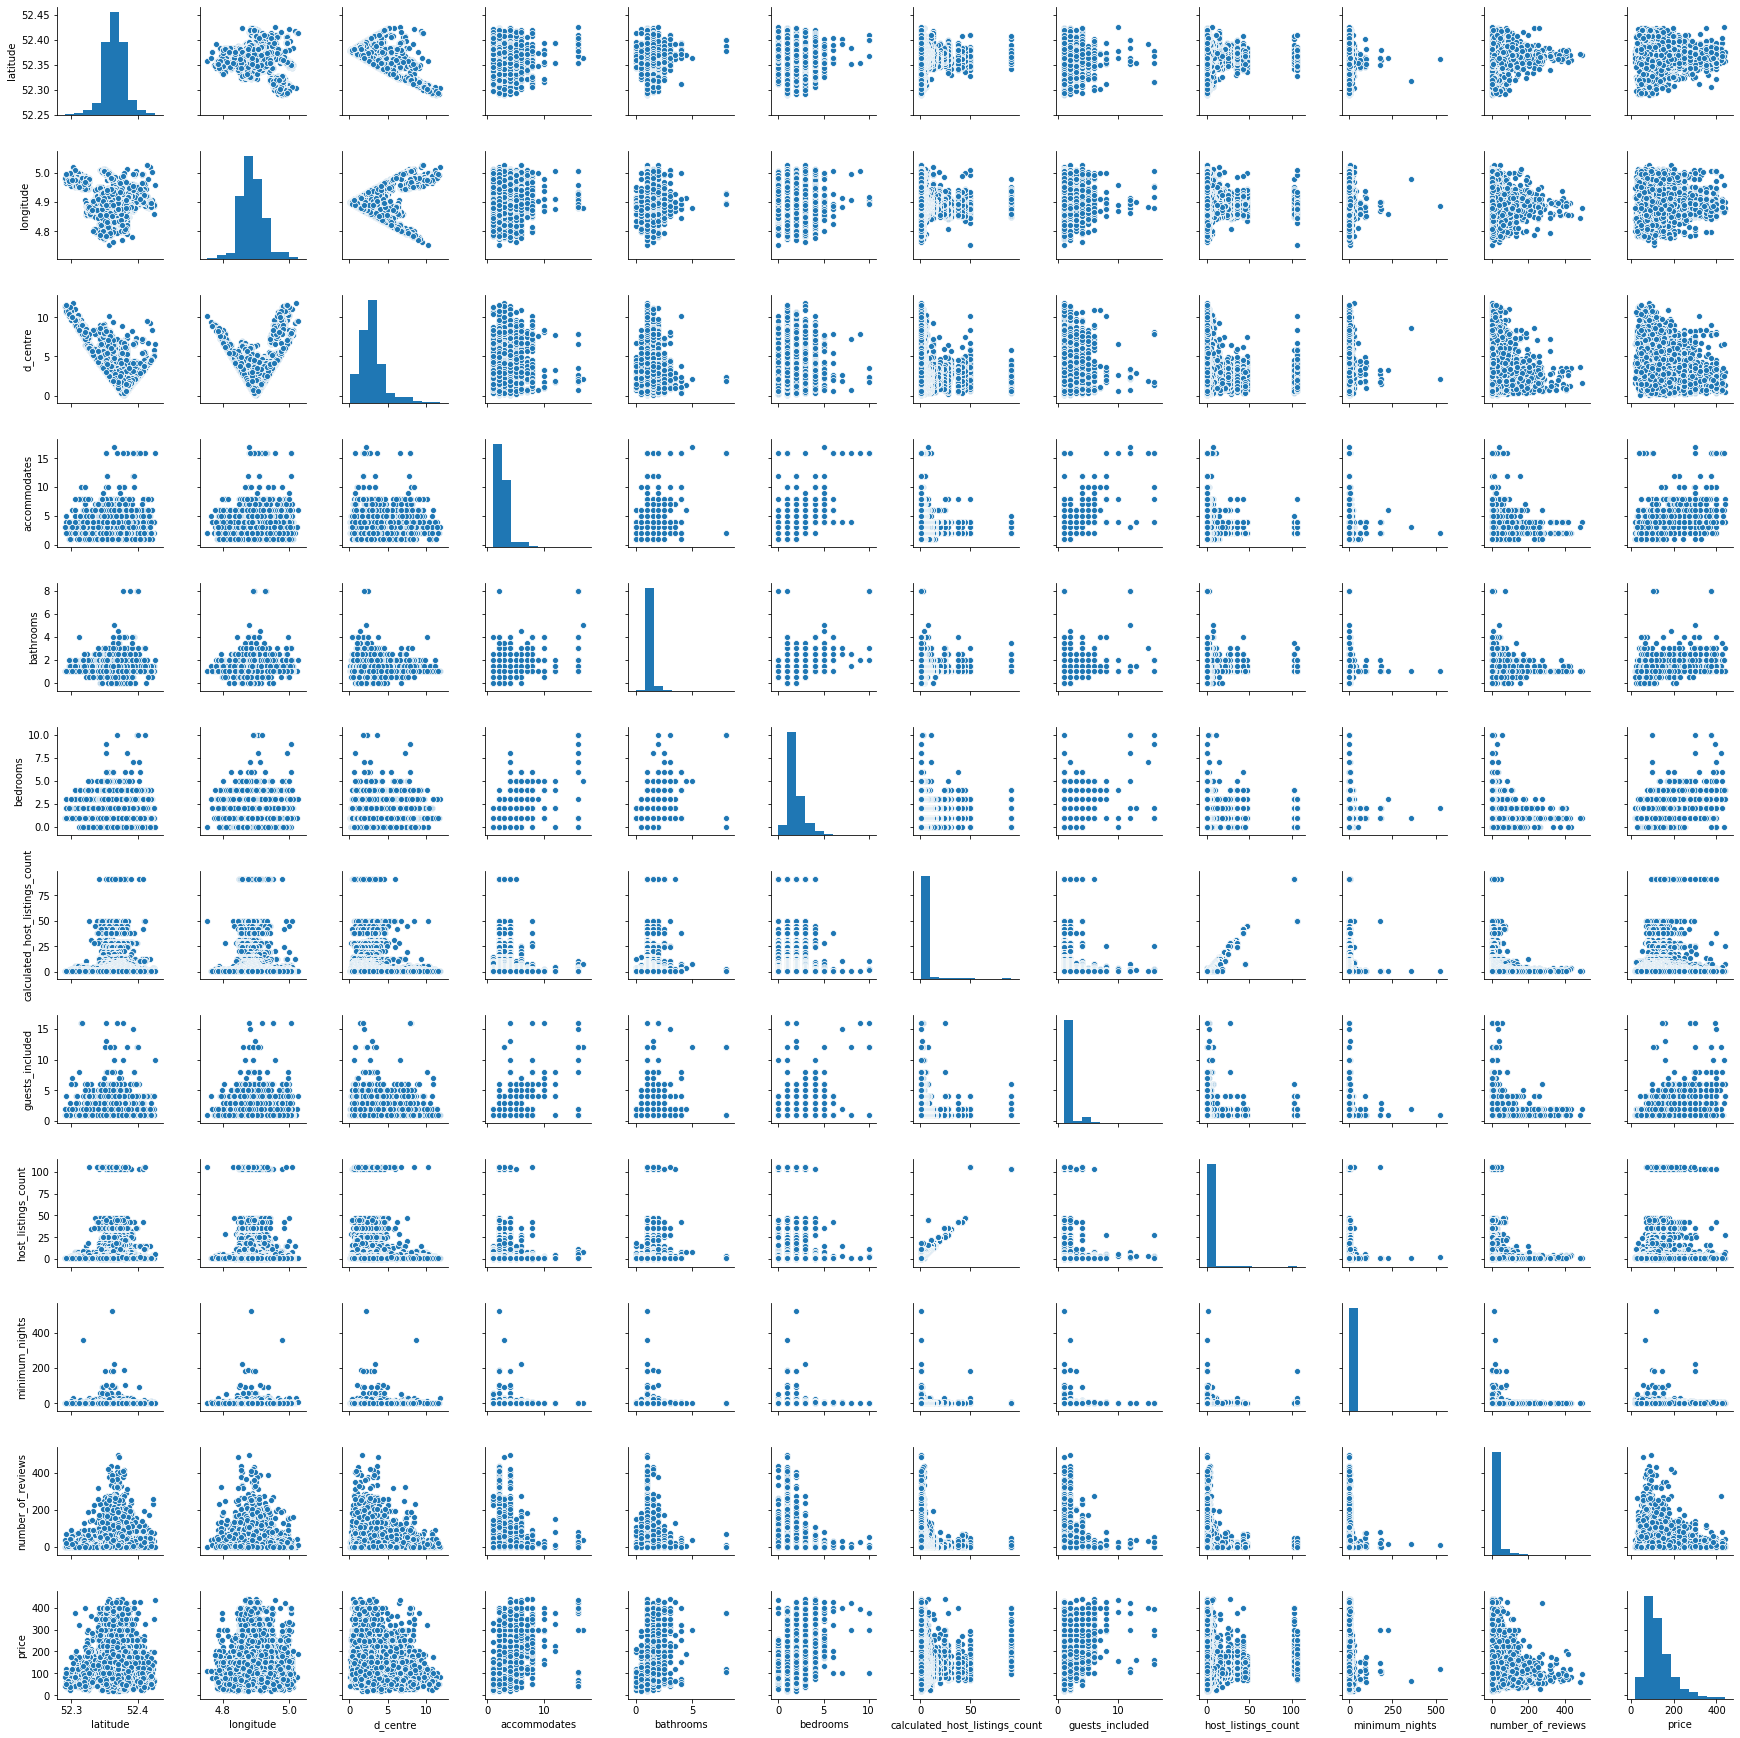

In [13]:
bnb_num = bnb.select_dtypes(include=np.number)
sns.pairplot(bnb_num, height=2)

## **Outlier Removal**